# Exploratory Data Analysis

Dataset obtained from Kaggle :
https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?select=train_sets_documentation.txt

Dataset contains information on flights occurring in 2019, with statistics on flight delay, carrier and airport information and weather data.

Below we explore the data availabe in the selected dataset and perform exploratory data analysis to search for important patterns that can be used in our analysis.

### Preview of available data

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import the modules
import os
import pandas as pd
    
#read the path
file_path = 'data/csv_files'
#list all the files from the directory
csv_files = os.listdir(file_path)

#append all files together
flight_data = pd.DataFrame()

for file in csv_files:
            df_temp = pd.read_csv('data/csv_files/'+file)
            flight_data = flight_data.append(df_temp, ignore_index=True)
flight_data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,81803,180,819756,12460183,0.000144,0.000149,18,Chicago Midway International,41.785,-87.752,Atlanta Municipal,0.00,0.0,0.0,64.0,13.87,49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.00,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,43512,4679,2743323,8501631,0.000254,0.000229,7,Stapleton International,39.774,-104.880,Los Angeles International,0.00,0.0,0.0,54.0,10.07,38.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,21136,1629,2780593,2884187,0.000032,0.000175,3,Los Angeles International,33.942,-118.408,Portland International,0.00,0.0,0.0,64.0,7.38,58.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,114987,6116,1903352,13382999,0.000062,0.000099,20,McCarran International,36.080,-115.152,Spokane International,0.00,0.0,0.0,104.0,4.92,92.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,24179,453,70476,1245396,0.000000,0.000090,17,James M Cox/Dayton International,39.901,-84.220,Philadelphia International,0.00,0.0,0.0,86.0,4.92,0.0,65.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217198,0.222554,0.251477,0.292230
6489058,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,110752,5250,673221,13382999,0.000062,0.000099,20,Dallas Love Field,32.847,-96.853,Austin - Bergstrom International,0.00,0.0,0.0,85.0,8.05,70.0,62.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.192585,0.171317,0.263840
6489059,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,110752,5085,1827202,13382999,0.000062,0.000099,1,Phoenix Sky Harbor International,33.436,-112.009,Portland International,0.00,0.0,0.0,89.0,4.03,74.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215726,0.112840,0.203724,0.266095
6489060,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,81498,4932,1486066,12460183,0.000144,0.000149,19,Detroit Metro Wayne County,42.217,-83.344,Douglas Municipal,0.38,0.0,0.0,44.0,9.17,40.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157390,0.186040,0.226980,0.286800


## Available Data

The creator of the dataset retrieved from Kaggle removed a number of available data points before generating the final data file. After doing an intial run of the models with the provided data, we went back in and added additional weather data points to improve our results.

#### Original Columns:

- **MONTH** - Month
- **DAY_OF_WEEK** - Day of Week
- **DEP_DEL15** - TARGET Binary of a departure delay over 15 minutes (1 is yes, 0 is no)
- **DISTANCE_GROUP** - Distance group to be flown by departing aircraft
- **DEP_BLOCK** - Departure block
- **SEGMENT_NUMBER** - The segment that this tail number is on for the day
- **CONCURRENT_FLIGHTS** - Concurrent flights leaving from the airport in the same departure block
- **NUMBER_OF_SEATS** - Number of seats on the aircraft
- **CARRIER_NAME** - Carrier (airline name)
- **AIRPORT_FLIGHTS_MONTH** - Avg Airport Flights per Month
- **AIRLINE_FLIGHTS_MONTH** - Avg Airline Flights per Month
- **AIRLINE_AIRPORT_FLIGHTS_MONTH** - Avg Flights per month for Airline AND Airport
- **AVG_MONTHLY_PASS_AIRPORT** - Avg Passengers for the departing airport for the month
- **AVG_MONTHLY_PASS_AIRLINE** - Avg Passengers for airline for month
- **FLT_ATTENDANTS_PER_PASS** - Flight attendants per passenger for airline
- **GROUND_SERV_PER_PASS** - Ground service employees (service desk) per passenger for airline
- **PLANE_AGE** - Age of departing aircraft
- **DEPARTING_AIRPORT** - Departing Airport
- **LATITUDE** - Latitude of departing airport
- **LONGITUDE** - Longitude of departing airport
- **PREVIOUS_AIRPORT** - Previous airport that aircraft departed from
- **PRCP** - Inches of precipitation for day
- **SNOW** - Inches of snowfall for day
- **SNWD** - Inches of snow on ground for day
- **TMAX** - Max temperature for day
- **AWND** - Max wind speed for day

#### Added Columns:

Weather stat breakdown

- **TMAX** - max temp
- **TAVG** - average temp
- **TMIN** - min temp

WT category - these are true/false so 1 indicates this weather event was present with 0 meaning not present

- **WT01** - fog
- **WT02** - heavy or heavy freezing fog
- **WT03** - thunder
- **WT05** - hail
- **WT07** - blowing dust, sand or other obstruction
- **WT08** - smoke or haze
- **WT09** - blowing or drifting snow
- **WT10** - tornado, waterspout or funnel cloud
- **WT11** - high or damaging winds


In [29]:
pd.set_option('display.max_columns', None)
flight_data.head() #display sample dataframe

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,81803,180,819756,12460183,0.000144,0.000149,18,Chicago Midway International,41.785,-87.752,Atlanta Municipal,0.0,0.0,0.0,64.0,13.87,49.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,22191,1956,1208249,1212846,0.000000,0.000094,15,LaGuardia,40.779,-73.876,Bangor International,0.0,0.0,0.0,48.0,12.08,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,43512,4679,2743323,8501631,0.000254,0.000229,7,Stapleton International,39.774,-104.880,Los Angeles International,0.0,0.0,0.0,54.0,10.07,38.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,21136,1629,2780593,2884187,0.000032,0.000175,3,Los Angeles International,33.942,-118.408,Portland International,0.0,0.0,0.0,64.0,7.38,58.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,114987,6116,1903352,13382999,0.000062,0.000099,20,McCarran International,36.080,-115.152,Spokane International,0.0,0.0,0.0,104.0,4.92,92.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192550,0.123487,0.196519,0.138067


In [30]:
print("Available data points within dataset:")
for col in flight_data.columns: 
    print(col)

Available data points within dataset:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


Exploration of the major airlines

In [31]:
print("Airlines covered in dataset and # of flights in 2019")
flight_data.value_counts(subset = 'CARRIER_NAME')

Airlines covered in dataset and # of flights in 2019


CARRIER_NAME
Southwest Airlines Co.          1296329
Delta Air Lines Inc.             938346
American Airlines Inc.           903640
United Air Lines Inc.            601044
SkyWest Airlines Inc.            584204
Midwest Airline, Inc.            300154
JetBlue Airways                  269596
Alaska Airlines Inc.             239337
American Eagle Airlines Inc.     228792
Comair Inc.                      219324
Endeavor Air Inc.                203827
Spirit Air Lines                 189419
Mesa Airlines Inc.               177600
Frontier Airlines Inc.           120872
Atlantic Southeast Airlines       99044
Hawaiian Airlines Inc.            74898
Allegiant Air                     42636
dtype: int64

In [32]:
#total delays
print("Total number of delayed flights at tracked airports in 2019")
flight_data["DEP_DEL15"].sum()

Total number of delayed flights at tracked airports in 2019


1227368

### Finding airports associated with the largest number of delays


In [33]:
#Delays by departing airport, sorted from highest to lowest

delay_by_departing_airport = flight_data.groupby(by="DEPARTING_AIRPORT")["DEP_DEL15"].sum()
delay_by_departing_airport.sort_values(ascending=False)

DEPARTING_AIRPORT
Chicago O'Hare International      74049
Atlanta Municipal                 65892
Dallas Fort Worth Regional        65497
Stapleton International           55609
Douglas Municipal                 44958
                                  ...  
Portland International Jetport      790
Pensacola Regional                  745
Spokane International               455
Sanford NAS                         341
Puerto Rico International            23
Name: DEP_DEL15, Length: 96, dtype: int64

In [34]:
#Delay by previous airport, sorted form highest to lowest
delay_by_origin_airport = flight_data.groupby(by="PREVIOUS_AIRPORT")["DEP_DEL15"].sum()
delay_by_origin_airport.sort_values(ascending=False)

PREVIOUS_AIRPORT
NONE                            176929
Chicago O'Hare International     43352
Atlanta Municipal                36464
LaGuardia                        32824
Dallas Fort Worth Regional       31568
                                 ...  
Owensboro Daviess County             2
Pago Pago International              1
Petersburg James A Johnson           1
Adak NS                              1
Yakutat Airport                      0
Name: DEP_DEL15, Length: 356, dtype: int64

Exploring weather data from most and least delayed airports

In [35]:
#average precipitation at most delayed airport
Chicago_rain = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Chicago O'Hare International")["PRCP"].mean()
Chicago_rain

0.1289543071616408

In [36]:
#average precipitation at least delayed airport
PR_rain = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Puerto Rico International")["PRCP"].mean()
PR_rain

0.0

### Visualization of flights by airport

Observing the data we can quickly see that Atlanta is likely associated with a large number of delays because of its very high volume of flights. However, Chicago is associated with the most delays but a notably smaller flight volume. We may want to explore weather patterns in Chicago to gain a better understanding.

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

from collections import Counter

## initialize a counter for the positions
departing = Counter()

## loop over rows to count up the positions
for ix, row in flight_data.iterrows():
    departing[row["DEPARTING_AIRPORT"]] += 1

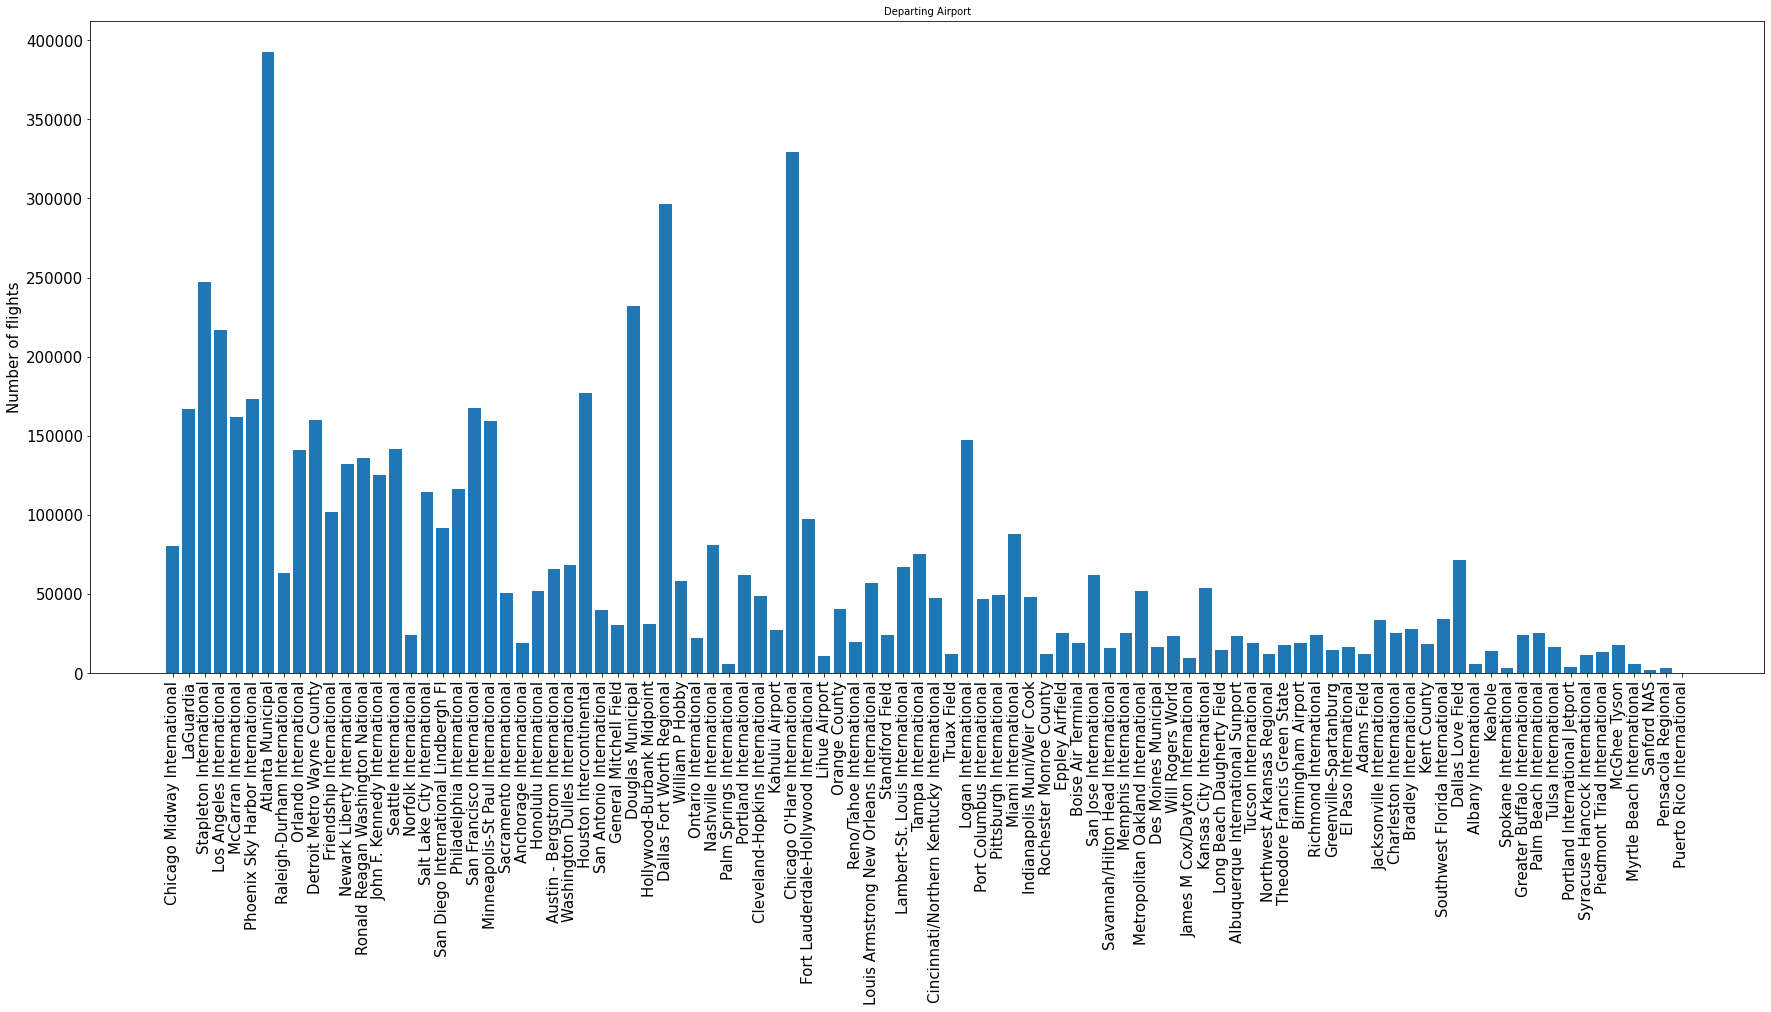

In [14]:
bar_fig = plt.figure(figsize = (30, 12)) 
    
## note the plot.bar() function takes an x-positon for bars
## in the event that data are not categorical,
## but we'll just use discrete positioning, i.e., left = [1,2,3, ...]
## to space out the bars
_  = plt.bar(
    x = range(1, len(departing) + 1),
    height = list(departing.values()),
    tick_label = list(departing.keys())
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Departing Airport", fontsize = 10)

## Set the y-label
_ = plt.ylabel("Number of flights", fontsize = 15)

## rotate the x-tick labels
_ = plt.xticks(rotation = 90)

## Determine how many observations fall under each class (0, not delayed. 1, delayed)

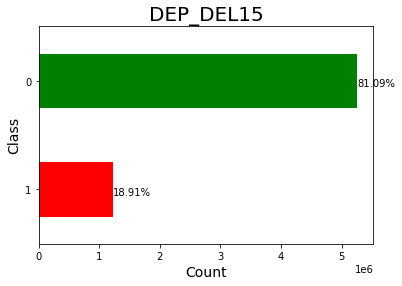

0    5261694
1    1227368
Name: DEP_DEL15, dtype: int64


In [16]:
# Plotting the percentage of observations that fall under each class
ax = flight_data["DEP_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("DEP_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(flight_data["DEP_DEL15"].value_counts())
fig = ax.get_figure()

## Explore LaGuardia Data Points

1.82% of all flights have a previous airport of LaGuardia, but 2.67% of all delayed flights have a previous airport of LaGuardia. This indicates that LaGuardia has an outsize impact on delays.

In [56]:
#percentage of delayed flights with previous airport of Laguardia
LaGuardia = flight_data.loc[flight_data['PREVIOUS_AIRPORT'] == "LaGuardia"]
delay_from_LG = LaGuardia['DEP_DEL15'].sum()
total_flights_from_LG = LaGuardia['DEP_DEL15'].count()
total_delays = flight_data["DEP_DEL15"].sum()
total_flights = flight_data["DEP_DEL15"].count()
LaGuardia_dep = flight_data.loc[flight_data['DEPARTING_AIRPORT'] == "LaGuardia"]
total_flights_outof_LG = LaGuardia_dep['DEP_DEL15'].count()

print("Total flights with Previous Airport as LaGuardia")
print(total_flights_from_LG)
print("Total flights delayed with Previous Airport as LaGuardia")
print(delay_from_LG)
print("Total delays in US system")
print(total_delays)
print("Percent of flights with previous airport as LaGuardia that are delayed")
print((delay_from_LG/total_flights_from_LG) * 100)
print("Percent of total delays with previous airport as LaGuardia")
print((delay_from_LG/total_delays) * 100)
print("Percent of all flights with previous airport LaGuardia out of all flights")
print((total_flights_from_LG/total_flights)*100)
print("Percent of all flights from LaGuardia")
print((total_flights_outof_LG/total_flights)*100)
print("Percent of all delays from LaGuardia")
print((delay_from_LG/total_delays)*100)

Total flights with Previous Airport as LaGuardia
118711
Total flights delayed with Previous Airport as LaGuardia
32824
Total delays in US system
1227368
Percent of flights with previous airport as LaGuardia that are delayed
27.650344113013958
Percent of total delays with previous airport as LaGuardia
2.674340540082518
Percent of all flights with previous airport LaGuardia out of all flights
1.829401537541173
Percent of all flights from LaGuardia
2.5690770098975784
Percent of all delays from LaGuardia
2.674340540082518


## Explore Douglas Municipal Data Points

Douglas Municipal has a larger total share of flights than LaGuardia (3.57% vs. 2.56%) but a lower impact on delays. It accounts for 2.07% of all delays, wheras LaGuardia accounts for 2.67%. 

In [55]:
Douglas = flight_data.loc[flight_data['PREVIOUS_AIRPORT'] == "Douglas Municipal"]
delay_from_D = Douglas['DEP_DEL15'].sum()
total_flights_from_D = Douglas['DEP_DEL15'].count()
Douglas_dep = flight_data.loc[flight_data['DEPARTING_AIRPORT'] == "Douglas Municipal"]
total_flights_outof_D = Douglas_dep['DEP_DEL15'].count()

print("Total flights with Previous Airport as Douglas")
print(total_flights_from_D)
print("Total flights delayed with Previous Airport as Douglas")
print(delay_from_D)
print("Total delays in US system")
print(total_delays)
print("Percent of flights with previous airport as Douglas that are delayed")
print((delay_from_D/total_flights_from_D) * 100)
print("Percent of total delays with previous airport as Douglas")
print((delay_from_D/total_delays) * 100)
print("Percent of all flights with previous airport Douglas out of all flights")
print((total_flights_from_D/total_flights)*100)
print("Percent of all flights from Douglas Municipal")
print((total_flights_outof_D/total_flights)*100)
print("Percent of all delays from Douglas Municipal")
print((delay_from_D/total_delays)*100)

Total flights with Previous Airport as Douglas
123960
Total flights delayed with Previous Airport as Douglas
25511
Total delays in US system
1227368
Percent of flights with previous airport as Douglas that are delayed
20.58002581477896
Percent of total delays with previous airport as Douglas
2.0785127199014477
Percent of all flights with previous airport Douglas out of all flights
1.9102915028397016
Percent of all flights from Douglas Municipal
3.573012555589698
Percent of all delays from Douglas Municipal
2.0785127199014477


## Compare Weather at LaGuardia to Douglas

Comparing weather data between LaGuardia and Douglas we see that LaGuardia is experiencing much more snow. Douglas has no snow accumulation at all. LaGuardia also has high wind speeds, which could disrupt flights, and is colder.

In [61]:
lg_rain = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["PRCP"].mean()
lg_snow = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["SNOW"].mean()
lg_snwd = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["SNWD"].mean()
lg_tmax = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["TMAX"].mean()
lg_awnd = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["AWND"].mean()
lg_tmin = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["TMIN"].mean()
lg_fog = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["WT01"].mean()
lg_thunder = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("LaGuardia")["WT03"].mean()

print("average precipitation LaGuardia")
print(lg_rain)
print("average snow LaGuardia")
print(lg_snow)
print("average snow on the ground LaGuardia")
print(lg_snwd)
print("average max temp LaGuardia")
print(lg_tmax)
print("average min temp LaGuardia")
print(lg_tmin)
print("average max wind speed LaGuardia")
print(lg_awnd)
print("average fog LaGuardia")
print(lg_fog)
print("average thunder LaGuardia")
print(lg_thunder)

average precipitation LaGuardia
0.13532130838767287
average snow LaGuardia
0.03550078280116828
average snow on the ground LaGuardia
0.032099646689739844
average max temp LaGuardia
63.371131732539936
average min temp LaGuardia
49.71579818726043
average max wind speed LaGuardia
10.763883053705705
average fog LaGuardia
0.3230479458217613
average thunder LaGuardia
0.0919206521543528


In [62]:
d_rain = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["PRCP"].mean()
d_snow = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["SNOW"].mean()
d_snwd = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["SNWD"].mean()
d_tmax = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["TMAX"].mean()
d_awnd = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["AWND"].mean()
d_tmin = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["TMIN"].mean()
d_fog = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["WT01"].mean()
d_thunder = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Douglas Municipal")["WT03"].mean()

print("average precipitation Douglas")
print(d_rain)
print("average snow Douglas")
print(d_snow)
print("average snow on the ground Douglas")
print(d_snwd)
print("average max temp Douglas")
print(d_tmax)
print("average min temp Douglas")
print(d_tmin)
print("average max wind speed Douglas")
print(d_awnd)
print("average fog Douglas")
print(d_fog)
print("average thunder Douglas")
print(d_thunder)

average precipitation Douglas
0.14512255504511523
average snow Douglas
0.00027905371891915465
average snow on the ground Douglas
0.0
average max temp Douglas
74.45264928511354
average min temp Douglas
52.79760194949429
average max wind speed Douglas
6.28040249293633
average fog Douglas
0.5186301783442238
average thunder Douglas
0.1551659442323866
